## ICP11 - Autoencoder
## Subash Chandra Biswal (U77884251)

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [1]:
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


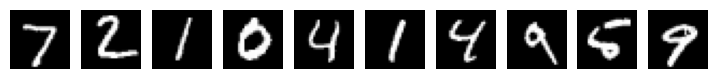

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model.

In [18]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 500)               392500    
                                                                 
 dense_33 (Dense)            (None, 300)               150300    
                                                                 
 dense_34 (Dense)            (None, 100)               30100     
                                                                 
 dense_35 (Dense)            (None, 6)                 606       
                                                                 
 dense_36 (Dense)            (None, 100)               700       
                                                                 
 dense_37 (Dense)            (None, 300)               30300     
                                                                 
 dense_38 (Dense)            (None, 500)              

### Train the autoencoder model.

In [19]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 10s 19ms/step - loss: 0.2079 - val_loss: 0.1587
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1527 - val_loss: 0.1474
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1455 - val_loss: 0.1437
Epoch 4/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1416 - val_loss: 0.1399
Epoch 5/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1388 - val_loss: 0.1379
Epoch 6/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1367 - val_loss: 0.1365
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1350 - val_loss: 0.1353
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1335 - val_loss: 0.1336
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1321 - val_loss: 0.1329
Epoch 10/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1309 - val_l

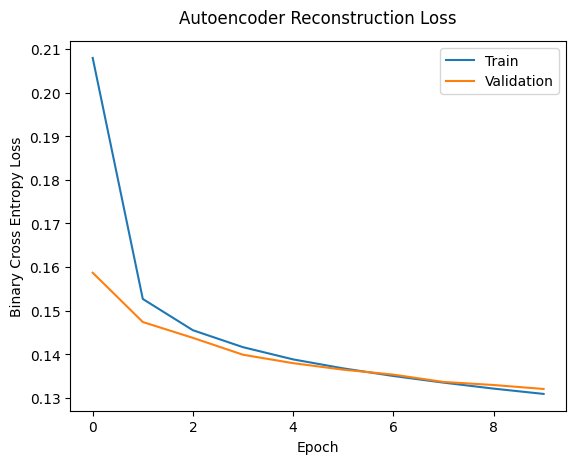

In [20]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 6s 20ms/step


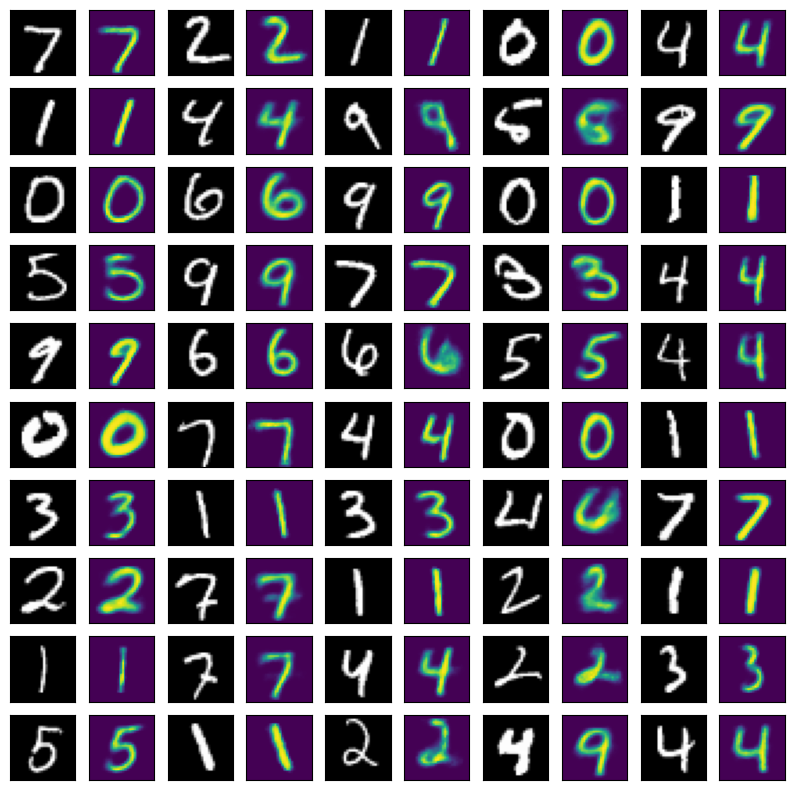

In [21]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Summary

It is clear from the test result verification that lower value for bottleneck layer loses information and so reconstruction loss is more than the model with bottleneck neurons of 16. So, the reconstructed digits of the test data are not much clear and correct.But, it could manage the work.

The bottleneck neurons of 100 could have below disadvantages.

- Since it preserve more information the processing time could increase dramatically.
- It could introduce more noise and hence lower performance.
- It could lead to overfitting.
